# Image Classification

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import imageio
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  RandomForestClassifier, BaggingClassifier
import warnings
import cv2
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.filterwarnings(action='ignore',category='UndefinedMetricWarning')
from sklearn.metrics import  f1_score, classification_report

In [13]:
_TRAIN_DIR = './Train/*.jpg' 
_TEST_DIR = './Test/*.jpg'

In [14]:
train_img = glob.glob(_TRAIN_DIR)
test_img = glob.glob(_TEST_DIR)

sorted_train_img = sorted([x for x in train_img])
sorted_test_img = sorted([x for x in test_img])

In [15]:
train_label = pd.read_csv('train_labels.csv',names = ['label'])
test_label = pd.read_csv('test_labels.csv',names = ['label'])

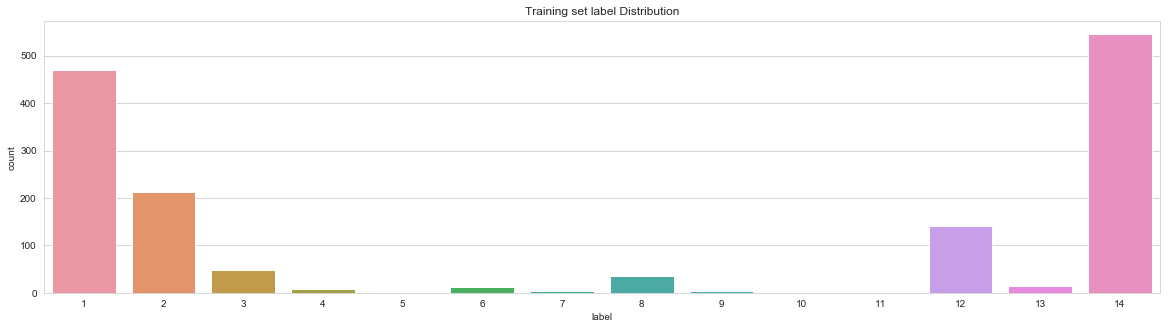

In [16]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
sns.countplot(data=train_label, x = "label");
plt.title('Training set label Distribution');

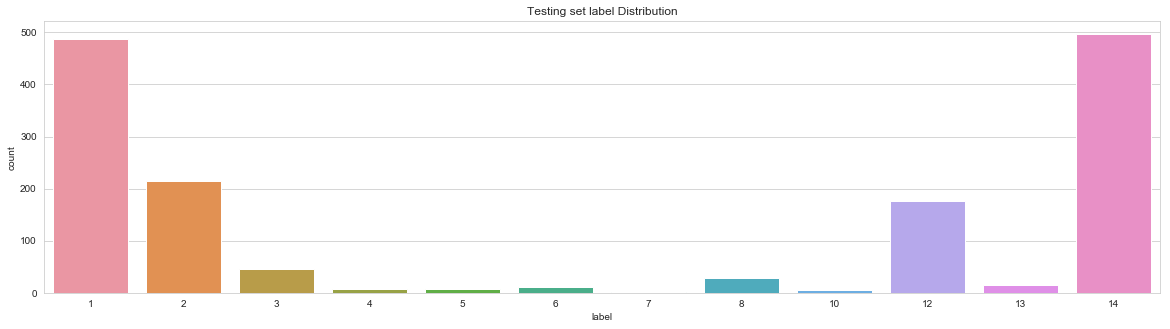

In [17]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
sns.countplot(data=test_label, x = "label");
plt.title('Testing set label Distribution');

In [18]:
def print_sample_images(images,label):
    plt.figure(figsize=(20,20))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imageio.imread(images[i]))
        plt.xlabel(label['label'][i])
    plt.show()

## Print sample Training images

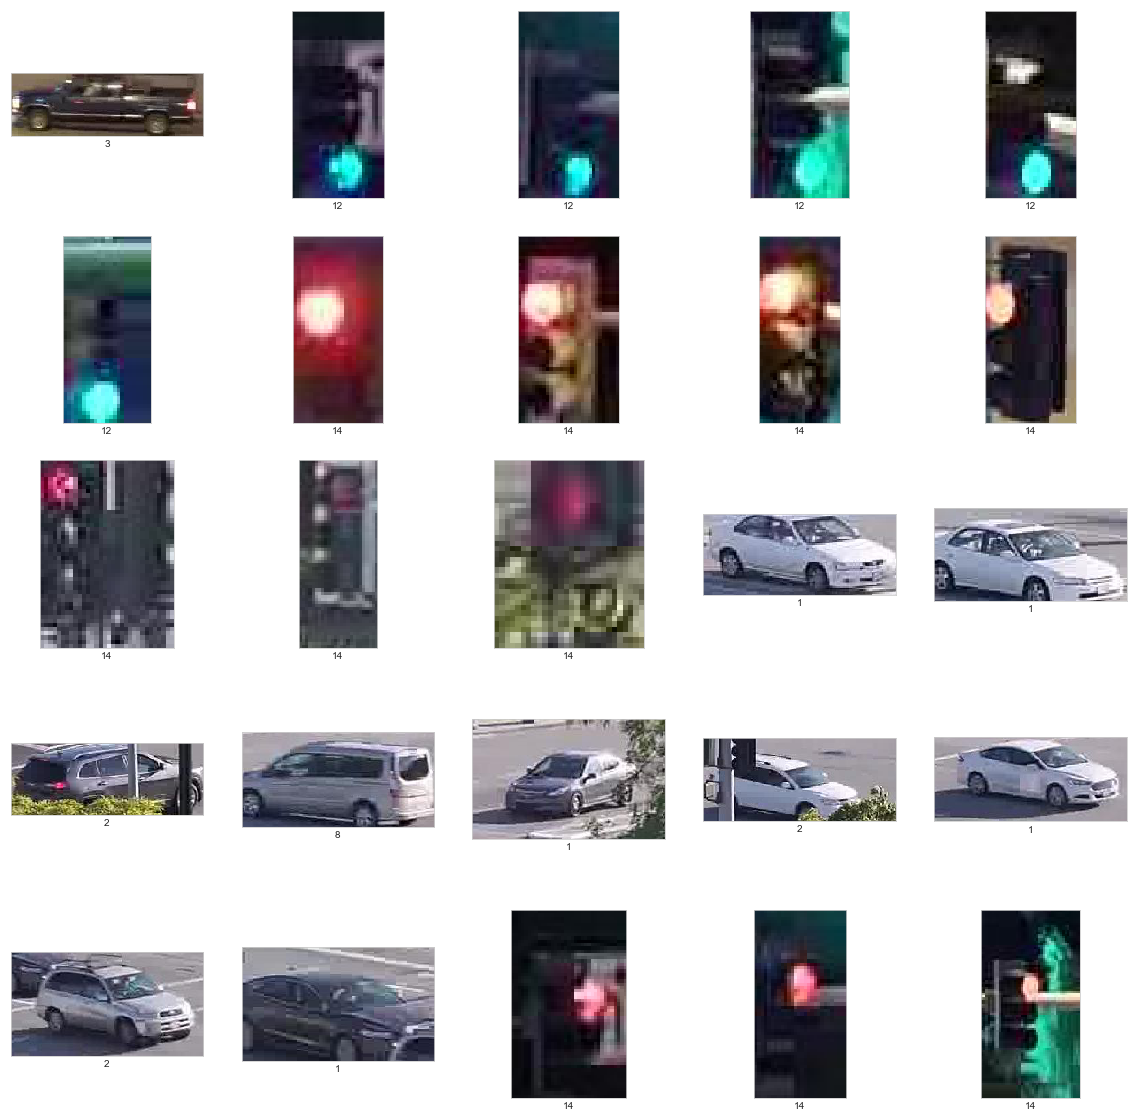

In [19]:
print_sample_images(sorted_train_img,train_label)

## Print Sample Test Images

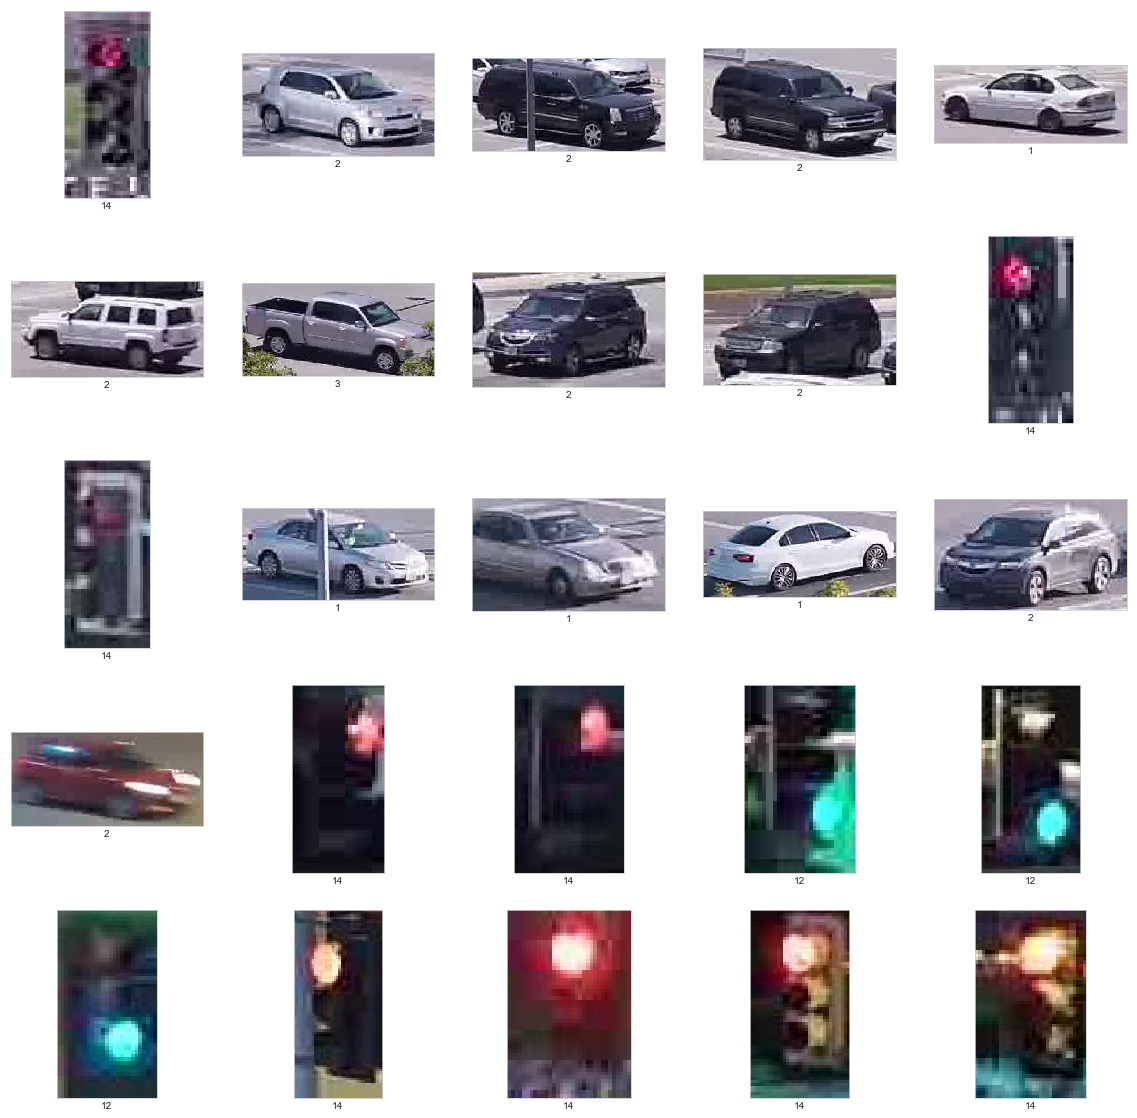

In [20]:
print_sample_images(sorted_test_img,test_label)

In [21]:
def flatten_resize_image(images):
    features = []
    for image in images:
       features.append(
           cv2.calcHist(
               imageio.imread(image), 
               [0, 1, 2], 
               None, 
               [9,9,9], 
               [0, 256, 0, 256, 0, 256]).flatten())
    return np.array(features)

In [22]:
train_features = flatten_resize_image(sorted_train_img)
test_features = flatten_resize_image(sorted_test_img)

In [23]:
print('Training data set shape :\t{}'.format(train_features.shape))
print('Testing data set shape  :\t{}'.format(test_features.shape))

Training data set shape :	(1500, 729)
Testing data set shape  :	(1500, 729)


In [24]:
scale = StandardScaler()
scaled_train = scale.fit_transform(train_features)
scaled_test = scale.transform(test_features)


In [25]:
# Random forest default parameters
rf = RandomForestClassifier(random_state=42)
rf.fit(scaled_train, train_label.values.ravel())
pred = rf.predict(scaled_test)

print('Testung Score {}'.format(rf.score(scaled_test, test_label.values.ravel())))

Testung Score 0.59


In [26]:
print(f1_score(test_label.values.ravel(),pred, average='weighted'))

0.529240507519684


/Users/aakashvarshney/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
print(classification_report(test_label.values.reshape(-1,1), pred))

              precision    recall  f1-score   support

           1       0.57      0.81      0.67       488
           2       0.33      0.15      0.21       215
           3       0.00      0.00      0.00        46
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00        29
          10       0.00      0.00      0.00         6
          12       0.39      0.18      0.25       176
          13       0.00      0.00      0.00        15
          14       0.68      0.86      0.76       497

   micro avg       0.59      0.59      0.59      1500
   macro avg       0.17      0.17      0.16      1500
weighted avg       0.51      0.59      0.53      1500



/Users/aakashvarshney/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aakashvarshney/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aakashvarshney/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
bc = BaggingClassifier(random_state=42)
bc.fit(scaled_train, train_label.values.ravel())
pred = bc.predict(scaled_test)

print('Testung Score {}'.format(bc.score(scaled_test, test_label.values.ravel())))
print('F1 Score {}'.format(f1_score(test_label.values.ravel(),pred, average='weighted')))
print(classification_report(test_label.values.reshape(-1,1), pred))

Testung Score 0.578
F1 Score 0.5278230582866502
              precision    recall  f1-score   support

           1       0.58      0.78      0.67       488
           2       0.23      0.13      0.17       215
           3       0.00      0.00      0.00        46
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00        29
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         0
          12       0.37      0.24      0.29       176
          13       0.00      0.00      0.00        15
          14       0.71      0.83      0.76       497

   micro avg       0.58      0.58      0.58      1500
   macro avg       0.14      0.15      0.15      1500
weighted avg       0.50      0.58      0.53      1500



/Users/aakashvarshney/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aakashvarshney/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/aakashvarshney/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aakashvarshney/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Us